<a href="https://colab.research.google.com/github/HubZun/Analisis_Data_Dicoding_Final_Project/blob/main/ML/TFDecisionForestModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Library

instal dulu library nya

In [ ]:
# Install TensorFlow Decision Forests if you haven't installed it
!pip install tensorflow_decision_forests

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras import layers, models
from tensorflow.keras.regularizers import l2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Cleaning

In [ ]:
nutrition_df = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/openfoodfacts_cleaned.csv')
nutrition_df.head()

<ipython-input-50-c8ea6ea7d483>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  nutrition_df = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/openfoodfacts_cleaned.csv')


,Unnamed: 0,product_name,generic_name,quantity,brands,categories_en,origins_en,countries_en,traces_en,additives_n,...,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,potassium_100g,calcium_100g,iron_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
0,3,Skyr,NaN,480 g,Danone,"Dairies,Fermented foods,Fermented milk product...",NaN,France,NaN,NaN,...,10.0,0.09,0.036,NaN,NaN,NaN,NaN,NaN,NaN,-5.0
1,4,Vitória crackers,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,...,7.8,1.40,0.560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,Hamburguesas de ternera 100%,NaN,NaN,NaN,NaN,NaN,Spain,NaN,NaN,...,15.7,2.10,0.840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,Blueberry Cobbler Coffee,NaN,NaN,NaN,NaN,NaN,United States,NaN,NaN,...,0.0,0.00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,...,0.2,2.04,0.816,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
nutrition_df.isna().sum()

,0
Unnamed: 0,0
product_name,0
generic_name,1870120
quantity,1344209
brands,838120
categories_en,931045
origins_en,1897307
countries_en,0
traces_en,1839690
additives_n,1255057


In [ ]:
columns_to_drop = [
    'Unnamed: 0', 'generic_name', 'quantity', 'brands', 'categories_en', 'origins_en',
    'traces_en', 'additives_n', 'additives_en', 'food_groups_en', 'ecoscore_score',
    'ecoscore_grade', 'main_category_en', 'monounsaturated-fat_100g',
    'polyunsaturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'vitamin-a_100g',
    'vitamin-c_100g', 'potassium_100g', 'calcium_100g', 'iron_100g',
    'salt_100g', 'carbohydrates_100g', 'countries_en', 'fat_100g','nutrition-score-fr_100g'
]

nutrition_df = nutrition_df.drop(columns=columns_to_drop)
nutrition_df.head()

,product_name,nutriscore_score,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,Skyr,-5.0,57.0,0.10,3.9,NaN,10.0,0.036,NaN
1,Vitória crackers,NaN,375.0,3.08,15.0,NaN,7.8,0.560,NaN
2,Hamburguesas de ternera 100%,NaN,874.9,6.10,1.0,NaN,15.7,0.840,NaN
3,Blueberry Cobbler Coffee,NaN,0.0,0.00,0.0,0.0,0.0,0.000,NaN
4,Sauce Sweety chili 0%,NaN,21.0,0.00,0.4,NaN,0.2,0.816,NaN


In [ ]:
nutrition_df['fruits-vegetables-nuts-estimate-from-ingredients_100g'].fillna(0, inplace=True)
nutrition_df['fiber_100g'].fillna(0, inplace=True)
nutrition_df.head()

<ipython-input-53-12aa7822acf8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nutrition_df['fruits-vegetables-nuts-estimate-from-ingredients_100g'].fillna(0, inplace=True)
<ipython-input-53-12aa7822acf8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'd

,product_name,nutriscore_score,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,Skyr,-5.0,57.0,0.10,3.9,0.0,10.0,0.036,0.0
1,Vitória crackers,NaN,375.0,3.08,15.0,0.0,7.8,0.560,0.0
2,Hamburguesas de ternera 100%,NaN,874.9,6.10,1.0,0.0,15.7,0.840,0.0
3,Blueberry Cobbler Coffee,NaN,0.0,0.00,0.0,0.0,0.0,0.000,0.0
4,Sauce Sweety chili 0%,NaN,21.0,0.00,0.4,0.0,0.2,0.816,0.0


In [ ]:
nutrition_df.duplicated().sum()

112655

In [ ]:
nutrition_df = nutrition_df.drop_duplicates()
nutrition_df = nutrition_df.dropna()
nutrition_df.head()

,product_name,nutriscore_score,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,Skyr,-5.0,57.0,0.1,3.9,0.0,10.0,0.036,0.0
6,Pur jus de pomme,9.0,63.0,0.0,15.5,0.0,0.2,0.000,0.0
7,Salade de carottes râpées,-4.0,32.0,0.1,3.9,0.0,0.9,0.168,0.0
13,Tarte noix de coco,14.0,381.0,15.5,21.9,4.4,4.6,0.040,0.0
21,Compote de poire,-2.0,157.0,0.0,27.0,3.6,0.6,0.000,0.0


In [ ]:
nutrition_df['energy_kj'] = nutrition_df['energy-kcal_100g'] * 4.184
nutrition_df.head()

<ipython-input-56-8dbeb32eaac8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nutrition_df['energy_kj'] = nutrition_df['energy-kcal_100g'] * 4.184


,product_name,nutriscore_score,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,energy_kj
0,Skyr,-5.0,57.0,0.1,3.9,0.0,10.0,0.036,0.0,238.488
6,Pur jus de pomme,9.0,63.0,0.0,15.5,0.0,0.2,0.000,0.0,263.592
7,Salade de carottes râpées,-4.0,32.0,0.1,3.9,0.0,0.9,0.168,0.0,133.888
13,Tarte noix de coco,14.0,381.0,15.5,21.9,4.4,4.6,0.040,0.0,1594.104
21,Compote de poire,-2.0,157.0,0.0,27.0,3.6,0.6,0.000,0.0,656.888


Convert 'nutriscore_score' to categorical

In [ ]:
def assign_grade(score):
    if -15 <= score <= -1:
        return "A"
    elif 0 <= score <= 2:
        return "B"
    elif 3 <= score <= 10:
        return "C"
    elif 11 <= score <= 18:
        return "D"
    elif 19 <= score <= 40:
        return "E"
    else:
        return "Invalid Score"

In [ ]:
nutrition_df['nutriscore_grade'] = nutrition_df['nutriscore_score'].apply(assign_grade)
nutrition_df.head()

,product_name,nutriscore_score,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,energy_kj,nutriscore_grade
0,Skyr,-5.0,57.0,0.1,3.9,0.0,10.0,0.036,0.0,238.488,A
6,Pur jus de pomme,9.0,63.0,0.0,15.5,0.0,0.2,0.000,0.0,263.592,C
7,Salade de carottes râpées,-4.0,32.0,0.1,3.9,0.0,0.9,0.168,0.0,133.888,A
13,Tarte noix de coco,14.0,381.0,15.5,21.9,4.4,4.6,0.040,0.0,1594.104,D
21,Compote de poire,-2.0,157.0,0.0,27.0,3.6,0.6,0.000,0.0,656.888,A


In [ ]:
nutrition_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 956387 entries, 0 to 1982823
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   product_name                                           956387 non-null  object 
 1   nutriscore_score                                       956387 non-null  float64
 2   energy-kcal_100g                                       956387 non-null  float64
 3   saturated-fat_100g                                     956387 non-null  float64
 4   sugars_100g                                            956387 non-null  float64
 5   fiber_100g                                             956387 non-null  float64
 6   proteins_100g                                          956387 non-null  float64
 7   sodium_100g                                            956387 non-null  float64
 8   fruits-vegetables-nuts-estimate-from-i

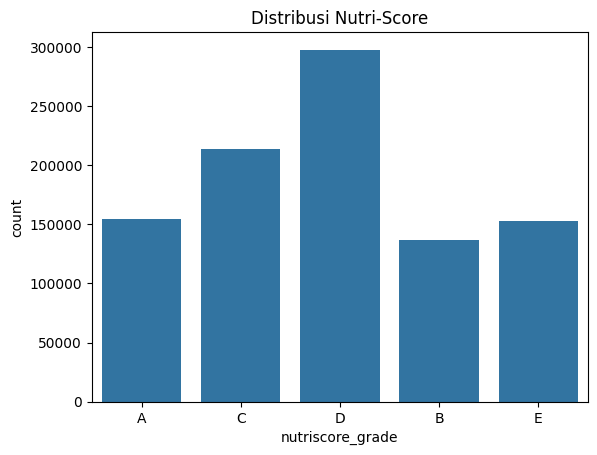

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi Nutri-Score
sns.countplot(x='nutriscore_grade', data=nutrition_df)
plt.title('Distribusi Nutri-Score')
plt.show()

In [ ]:
# Features and target
X = nutrition_df[['saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
        'sodium_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'energy_kj']]
y = nutrition_df['nutriscore_grade']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts categories (A, B, C, etc.) to integers

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build Neural Network Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [ ]:
# One-hot encode the target variable
y_train_one_hot = to_categorical(y_train)
y_val_one_hot = to_categorical(y_val)
y_test_one_hot = to_categorical(y_test)


In [ ]:
# Define the model
model = Sequential()

# Input layer
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))  # Adjust input_dim to number of features

# Hidden layers
model.add(Dense(64, activation='relu'))  # You can adjust the number of neurons and layers

# Output layer (number of units = number of classes in nutriscore_grade)
model.add(Dense(y_train_one_hot.shape[1], activation='softmax'))  # Softmax for multi-class classification


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train_one_hot,
                    validation_data=(X_val, y_val_one_hot),
                    epochs=5,  # You can adjust the number of epochs
                    batch_size=32)  # You can adjust the batch size


Epoch 1/100
20921/20921 ━━━━━━━━━━━━━━━━━━━━ 348s 17ms/step - accuracy: 0.5948 - loss: 0.9242 - val_accuracy: 0.6400 - val_loss: 0.8472
Epoch 2/100
20921/20921 ━━━━━━━━━━━━━━━━━━━━ 383s 17ms/step - accuracy: 0.6346 - loss: 0.8529 - val_accuracy: 0.6506 - val_loss: 0.8454
Epoch 3/100
20921/20921 ━━━━━━━━━━━━━━━━━━━━ 383s 17ms/step - accuracy: 0.6448 - loss: 0.8318 - val_accuracy: 0.6521 - val_loss: 0.8228
Epoch 4/100
20921/20921 ━━━━━━━━━━━━━━━━━━━━ 354s 17ms/step - accuracy: 0.6502 - loss: 0.8175 - val_accuracy: 0.6558 - val_loss: 0.8104
Epoch 5/100
20921/20921 ━━━━━━━━━━━━━━━━━━━━ 359s 17ms/step - accuracy: 0.6537 - loss: 0.8093 - val_accuracy: 0.6641 - val_loss: 0.8020
Epoch 6/100
20921/20921 ━━━━━━━━━━━━━━━━━━━━ 371s 17ms/step - accuracy: 0.6581 - loss: 0.8011 - val_accuracy: 0.6540 - val_loss: 0.8265
Epoch 7/100
20921/20921 ━━━━━━━━━━━━━━━━━━━━ 388s 17ms/step - accuracy: 0.6608 - loss: 0.7952 - val_accuracy: 0.6626 - val_loss: 0.7933
Epoch 8/100
20921/20921 ━━━━━━━━━━━━━━━━━━━━ 374

# Set Data for Prediction

In [ ]:
# Misalnya kita memiliki data baru yang ingin diprediksi dalam format yang sama seperti X_train
# Contoh data baru, harus memiliki kolom yang sama dengan X_train
# new_data = [[0.1, 3.9, 0.0, 10.0, 0.036, 0.0, 238.488]]  # Contoh data (saturated-fat_100g, sugars_100g, dll.)


new_data = pd.DataFrame({
    'saturated-fat_100g': [1.5, 0.1],
    'sugars_100g': [3.2, 3.9],
    'fiber_100g': [2.0, 0.0],
    'proteins_100g': [4.0, 10.0],
    'sodium_100g': [0.3, 0.036],
    'fruits-vegetables-nuts-estimate-from-ingredients_100g': [50, 0.0],
    'energy_kj': [500, 238.488]
})

# Normalisasi data baru menggunakan scaler yang sama
new_data_scaled = scaler.transform(new_data)

In [ ]:
# Melakukan prediksi
predictions = model.predict(new_data_scaled)

# predictions adalah array 2D dengan probabilitas untuk setiap kelas
# Misalnya, jika ada 5 kelas, predictions[0] akan memberikan probabilitas untuk setiap kelas
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[3.29615176e-01 5.22723496e-01 1.29852653e-01 1.77610163e-02
  4.76172136e-05]
 [5.21204948e-01 1.22932814e-01 1.74707830e-01 1.81038246e-01
  1.16100666e-04]]


In [ ]:
# Mengambil kelas dengan probabilitas tertinggi
predicted_class = tf.argmax(predictions, axis=1).numpy()  # Ambil indeks kelas dengan probabilitas tertinggi

# Jika Anda ingin melihat label kelas, ubah kembali hasil encoding
predicted_label = label_encoder.inverse_transform(predicted_class)

print(f'Prediksi kelas untuk data baru: {predicted_label}')

Prediksi kelas untuk data baru: ['B' 'A']


# Build TF Decision Forest Model

In [ ]:
import tensorflow_decision_forests as tfdf
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

# Asumsi X_train, y_train, X_val, y_val sudah benar dan siap
# Misalnya, y_train dan y_val perlu dikonversi ke kategori jika berupa angka kontinu
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_val_encoded = encoder.transform(y_val)

# Model GBDT dengan lebih banyak pohon dan kedalaman lebih dalam
model = tfdf.keras.GradientBoostedTreesModel(
    task=tfdf.keras.Task.CLASSIFICATION,
    num_trees=100,           # Jumlah pohon
    max_depth=15,            # Kedalaman pohon
    min_examples=10,         # Jumlah minimal contoh per daun
)

# Melatih model
print("Melatih model...")
model.fit(X_train, y_train_encoded)


# Prediksi pada data validasi
y_pred = model.predict(X_val)

# Jika model mengeluarkan probabilitas, ubah ke kelas dengan argmax
y_pred_classes = tf.argmax(y_pred, axis=-1).numpy()

# Menghitung akurasi dengan sklearn
accuracy = accuracy_score(y_val_encoded, y_pred_classes)
print(f"Akurasi pada data validasi (dengan sklearn): {accuracy:.4f}")


Use /tmp/tmpdst1vetv as temporary training directory
Melatih model...
Reading training dataset...
Training dataset read in 0:00:02.820180. Found 669470 examples.
Training model...
Model trained in 0:19:12.211225
Compiling model...
Model compiled.
4484/4484 [==============================] - 37s 8ms/step
Akurasi pada data validasi (dengan sklearn): 0.8057


In [ ]:
val_predictions = model.predict(X_val)

val_predictions = [prediction.argmax() for prediction in val_predictions]

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Evaluate the model on the test data
test_predictions = model.predict(X_test)

# Convert probability predictions to class labels by taking the argmax
test_predictions = [prediction.argmax() for prediction in test_predictions]

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")

4484/4484 [==============================] - 37s 8ms/step
Validation Accuracy: 0.8057
4484/4484 [==============================] - 37s 8ms/step
Test Accuracy: 0.8064


In [ ]:
X_new = pd.DataFrame({
    'saturated-fat_100g': [1.5, 0.1],
    'sugars_100g': [3.2, 3.9],
    'fiber_100g': [2.0, 0.0],
    'proteins_100g': [4.0, 10.0],
    'sodium_100g': [0.3, 0.036],
    'fruits-vegetables-nuts-estimate-from-ingredients_100g': [50, 0.0],
    'energy_kj': [500, 238.488]
})

In [ ]:
X_new_scaled = scaler.transform(X_new)  # Terapkan normalisasi pada data baru

In [ ]:
predictions = model.predict(X_new_scaled)

# Ekstrak kelas yang diprediksi
predicted_classes = tf.argmax(predictions, axis=1).numpy()

# Convert back to original labels if necessary
predicted_labels = label_encoder.inverse_transform(predicted_classes)

# Tampilkan hasil prediksi
print(predicted_labels)

1/1 [==============================] - 0s 65ms/step
['B' 'A']


# Save Model and ZIP 'saved_model' Directory

In [ ]:
model.save("saved_model/")

In [ ]:
!zip -r saved_model.zip saved_model/

  adding: saved_model/ (stored 0%)
  adding: saved_model/variables/ (stored 0%)
  adding: saved_model/variables/variables.index (deflated 32%)
  adding: saved_model/variables/variables.data-00000-of-00001 (deflated 54%)
  adding: saved_model/fingerprint.pb (stored 0%)
  adding: saved_model/assets/ (stored 0%)
  adding: saved_model/assets/bcc65fd069f044d6header.pb (deflated 26%)
  adding: saved_model/assets/bcc65fd069f044d6nodes-00002-of-00003 (deflated 50%)
  adding: saved_model/assets/bcc65fd069f044d6nodes-00001-of-00003 (deflated 50%)
  adding: saved_model/assets/bcc65fd069f044d6gradient_boosted_trees_header.pb (deflated 77%)
  adding: saved_model/assets/bcc65fd069f044d6nodes-00000-of-00003 (deflated 52%)
  adding: saved_model/assets/bcc65fd069f044d6data_spec.pb (deflated 21%)
  adding: saved_model/assets/bcc65fd069f044d6done (stored 0%)
  adding: saved_model/keras_metadata.pb (deflated 58%)
  adding: saved_model/saved_model.pb (deflated 85%)


# Download ZIP File

In [ ]:
!download saved_model.zip

/bin/bash: line 1: download: command not found
